### **0. Clustering - Introducción**

- Ejercicio de clustering

- El dataset ya tiene la variable target ("type") definida en 6 clases

- Se realiza clustering a pesar de ello con fin práctico comparativo

In [3]:
#manejo y tratamiento de datos

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#visualizacion de datos

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#entrenamiento de Machine Learning

from sklearn.preprocessing import MinMaxScaler

#Conteo de Numeros

from collections import Counter

# Clustering

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold  

#Metricas

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### **1. Análisis Exploratorio de datos (EDA)**

In [4]:
df = pd.read_csv("Breast_GSE45827.csv")

# df = df[df["type"] != "normal"].reset_index(drop = True)

df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [5]:
df.shape

(151, 54677)

In [6]:
df.columns

Index(['samples', 'type', '1007_s_at', '1053_at', '117_at', '121_at',
       '1255_g_at', '1294_at', '1316_at', '1320_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54677)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB


In [8]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095,7.787712,...,12.359605,11.823386,14.018193,13.773030,7.621929,5.699042,6.185605,2.918774,3.624008,3.173868
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550,1.648260,...,0.318436,0.369859,0.253870,0.290556,0.857777,0.860841,0.953867,0.093126,0.145394,0.101907
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065,3.866030,...,11.650564,10.939760,13.419083,13.191191,5.729767,4.326227,4.301471,2.733497,3.299401,2.937393
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260,6.804510,...,12.149550,11.592631,13.807282,13.523011,6.884862,4.967515,5.336542,2.861549,3.532740,3.109767
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957,7.912255,...,12.321900,11.830756,14.002497,13.740376,7.795425,5.489450,6.209136,2.911734,3.615106,3.163205
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337,8.887997,...,12.527235,12.021728,14.232589,14.028020,8.195458,6.449022,7.046721,2.961270,3.698539,3.229561
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006,11.710498,...,13.509037,13.119966,14.622678,14.482744,10.291243,8.112206,9.121638,3.322275,4.160823,3.451855


In [9]:
df.duplicated().sum() # filas duplicadas

0

In [10]:
df.isna().sum() #datos Null en el  DataFrame

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

In [11]:
df.isna().sum().sum() #Al ser tantas columnas se hace sum() sobre sum() para ver si en alguna columna intermedia hay Null

0

In [12]:
#La variable target ("type") tiene 6 clases en el dataset original, y estan desbalanceadas

df["type"].value_counts()

type
basal        41
HER          30
luminal_B    30
luminal_A    29
cell_line    14
normal        7
Name: count, dtype: int64

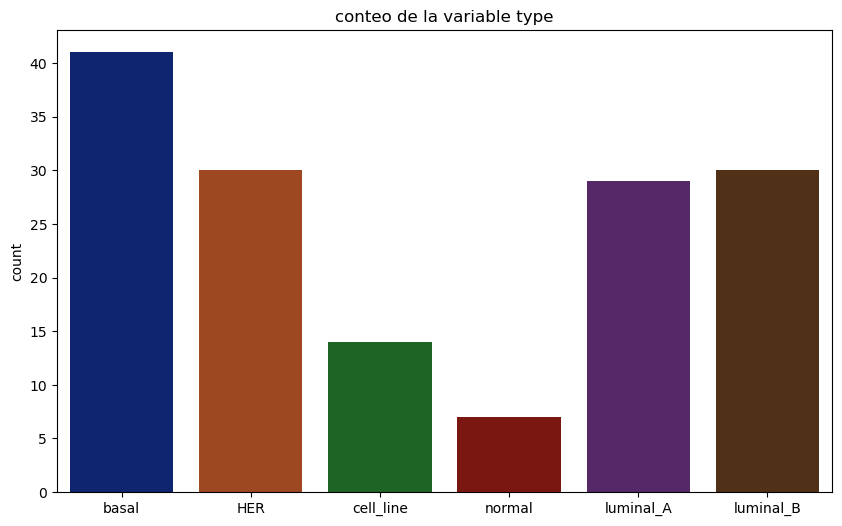

In [13]:
# visualizacion clases variable target

plt.figure(figsize = (10, 6))

# Datos Originales con etiqueta real

sns.countplot(x = df["type"].values, palette="dark")

plt.title("conteo de la variable type")
plt.show()

### **2. Procesamiento de los datos previo a clustering**

In [14]:
#Se elimina la variable "samples" que no contiene informacion genetica, y que no debe que afectar al clustering
#Tambien se elimina la variable target "type", no debe estar en el conjunto de variables explicativas del clustering

X = df.drop(["samples", "type"], axis = 1)

X


,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,8.870780,3.278896,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,7.767646,3.589636,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,9.417956,3.552253,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,9.400056,3.368243,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,8.015534,4.126711,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,8.248133,3.735215,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,7.523521,3.718392,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,7.364773,4.148290,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [15]:
# Normalizacion y entrenamiento (fit)

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.56229373, 0.59452011, 0.46127698, ..., 0.39600615, 0.2427308 ,
        0.7087131 ],
       [0.56500798, 0.6248287 , 0.6384052 , ..., 0.34183768, 0.45072597,
        0.24667753],
       [0.62307587, 0.81679553, 0.27001613, ..., 0.19393886, 0.29160589,
        0.42985184],
       ...,
       [0.8445875 , 0.35133745, 0.42795645, ..., 0.59722072, 0.38244555,
        0.54117618],
       [0.70483786, 0.44263234, 0.33346537, ..., 0.48410131, 0.54699822,
        0.32053876],
       [0.92102592, 0.40395516, 0.31311407, ..., 0.55723609, 0.64791041,
        0.3740503 ]])

In [16]:
X.flatten() #Sirve para aplanar las dimensiones de X

array([0.56229373, 0.59452011, 0.46127698, ..., 0.55723609, 0.64791041,
       0.3740503 ])

In [17]:
X.shape

(151, 54675)

In [18]:
#Transformacion de categórica a numérica de la variable target "type"

dict_type = {x : num for num, x in enumerate(df["type"].unique())}

dict_type

{'basal': 0,
 'HER': 1,
 'cell_line': 2,
 'normal': 3,
 'luminal_A': 4,
 'luminal_B': 5}

In [19]:
# .map aplica la función dada a cada elemento del iterable y devuelve un objeto map que contiene los resultados.

df["type"].map(dict_type)

0      0
1      0
2      0
3      0
4      0
      ..
146    5
147    5
148    5
149    5
150    5
Name: type, Length: 151, dtype: int64

In [20]:
df["type"].apply(lambda x : dict_type[x])

0      0
1      0
2      0
3      0
4      0
      ..
146    5
147    5
148    5
149    5
150    5
Name: type, Length: 151, dtype: int64

In [21]:
#Sustituye los valores anteriores en la columna "type"

df["type"] = df["type"].apply(lambda x : dict_type[x])

In [22]:
Y = df["type"]

Y

0      0
1      0
2      0
3      0
4      0
      ..
146    5
147    5
148    5
149    5
150    5
Name: type, Length: 151, dtype: int64

In [23]:
Y.shape

(151,)

### **3. Clustering**

### **3.1  Clustering con K-Means**

In [24]:
#Clusterizacion con K-Means

kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(X)

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [25]:
#K-means asigna etiquetas a los clusters en modo random, por lo que no coincidiran con las de la variable "type" original

kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 2, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
#.cluster_centers_ devuelve el centroide de cada cluster

kmeans.cluster_centers_

array([[0.64925737, 0.54472916, 0.47167584, ..., 0.25325658, 0.35620743,
        0.32581771],
       [0.76262952, 0.39558627, 0.41724153, ..., 0.33415187, 0.47736886,
        0.49048054],
       [0.74605402, 0.34915949, 0.41799779, ..., 0.31007182, 0.30902739,
        0.45630339],
       [0.5754404 , 0.78293211, 0.14515604, ..., 0.53618378, 0.63134044,
        0.63768019],
       [0.5850803 , 0.54594041, 0.46764422, ..., 0.28333872, 0.28394907,
        0.55117657],
       [0.64447427, 0.12730825, 0.20190925, ..., 0.27235361, 0.2472204 ,
        0.50172563]])

In [27]:
# .inertia_  representa la suma de las distancias al cuadrado de cada punto de datos al centroide más cercano.

kmeans.inertia_

185906.1317261883

In [28]:
# Para permutar las etiquetas y hacer que coincidan con las de la variable "type" se calculan las distancias entre puntos de los clusters y puntos de "type"

def distance_cluster(P1, P2): # Funcion para calcular distancias entre valores de etiquetas de clustering vs valores de etiquetas de clase de la variable "type"
    
    return np.sqrt(np.sum([(x - y)**2 for x, y in zip(P1, P2)])) # Calculo de la distancia euclideana entre puntos
                                                                 # Las distancias mas bajas entre cluster y clase real "type" corresponderan a las etiquetas correctas para el clustering

df["cluster"] = kmeans.labels_ 

#####################################################################################

mean_type = df.drop("cluster", axis = 1).groupby("type", as_index = False).mean() # Calculo de la media agrupando por los valores de "type"

mean_cluster = df.drop("type", axis = 1).groupby("cluster", as_index = False).mean() # Calculo de la media agrupando por los valores de "cluster"

#####################################################################################

# Se crea DataFrame con los valores de etiquetas "type", "cluster" y el calculo de distancias entre grupos

distancias = list()

for t in mean_type["type"]: 
    for c in mean_cluster["cluster"]:
                
        d = distance_cluster(mean_type[mean_type["type"] == t].iloc[:, 1:].values, mean_cluster[mean_cluster["cluster"] == c].iloc[:, 1:].values)
        
        distancias.append([t, c, d])
        
        
df_distancias = pd.DataFrame(data = distancias, columns = ["type", "cluster", "distancia"])

#####################################################################################

pd.concat([df_distancias[df_distancias["type"] == i].sort_values(by = "distancia") for i in range(0, 6)]).sort_values("distancia") # Muestra distancias de menor a mayor entre las etiquetas de cluster y de "type"
                                                                                                                                   



,type,cluster,distancia
15,2,3,0.000000
23,3,5,16.532774
26,4,2,27.388560
0,0,0,32.823023
31,5,1,36.729476
32,5,2,47.712561
6,1,0,65.424607
10,1,4,69.851762
4,0,4,70.029494
25,4,1,70.172901


In [29]:
#Codigo para reasignar la etiqueta de clustering a la etiqueta mas correcta de la variable type en base a las distancias calculadas anteriormente

map_cluster = {0 : 0, #Que valor de cluster corresponde a que valor de "type" en base a distancia minima
               1 : 5,
               2 : 4,
               3 : 2,
               4 : 1,
               5 : 3}

dict_type2 = {v : k for k, v in dict_type.items()}

df["cluster"] = df["cluster"].apply(lambda x : map_cluster[x]) # Reasignar etiquetas a los clusters en base al mapeo anterior

############################################################################################

df_1 = pd.DataFrame(df.value_counts(["type"])).reset_index()  # df1 con conteos de variable "type"

df_1.columns = ["label", "count"]

df_1["cat"] = "type"

df_2 = pd.DataFrame(df.value_counts(["cluster"])).reset_index()   # df2 con conteos de variable "cluster"

df_2.columns = ["label", "count"]

df_2["cat"] = "cluster"

df_final_cluster = pd.concat([df_1, df_2])  # Union de los dos dfs

#############################################################################################

# grafico de representacion de conteo de la variable type comparando con el conteo de los clusters reetiquetados por distancia

df_final_cluster = df_final_cluster.sort_values("label")

df_final_cluster["label"] = df_final_cluster["label"].apply(lambda x : dict_type2[x])

# df_final_cluster["label"] = df_final_cluster["label"].astype("str")

px.bar(data_frame = df_final_cluster, x = "label", y = "count", color = "label", facet_col = "cat", ) # Graficar conteos de las etiquetas de clustering y variable "type" original


 **Confusion Matrix**: sirve para evaluar la precisión de una clasificación

In [30]:
#Matriz de confusion entre prediccion de clustering y variable "type" original

confusion_matrix(df["type"], df["cluster"])

array([[29, 11,  0,  0,  0,  1],
       [12, 11,  0,  0,  0,  7],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  6,  1,  0],
       [ 0,  0,  0,  0, 25,  4],
       [ 0,  0,  0,  0, 14, 16]], dtype=int64)

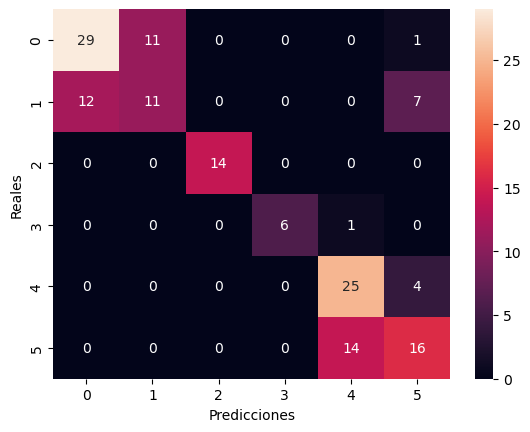

In [37]:
#Representacion de la confusion matrix en un mapa de calor

conf_matrix = metrics.confusion_matrix(df["type"], df["cluster"])
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

 **Accuracy**: de la prediccion por clustering con respecto a los datos reales

In [33]:
accuracy_score(df["type"], df["cluster"])

0.6688741721854304

 **Metodo del codo**: es una técnica utilizada en clustering (agrupamiento) para encontrar el número óptimo de clusters (grupos) en un conjunto de datos. 

In [35]:
#El objetivo es determinar el número de clusters optimo 
#Se obtienen  Inercias, Shilouette para los k´s

inercias = list() 

sil_score = list()


for k in range(2, 12): 
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X)    
    
    inercias.append(kmeans.inertia_) 
    sil_score.append(silhouette_score(X, kmeans.labels_))
    
    
inercias # El método del codo se basa en inercias (suma de las distancias al cuadrado de los puntos de datos al centroide de su cluster)  
         # Se calcula la inercia  para diferentes valores de k (número de clusters).

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mar

[233078.04743710964,
 212742.21885716298,
 201890.3736673894,
 191629.7443969137,
 185906.1317261883,
 181814.41617765036,
 179342.25133107763,
 174286.233179671,
 172665.103199616,
 171495.9586438253]

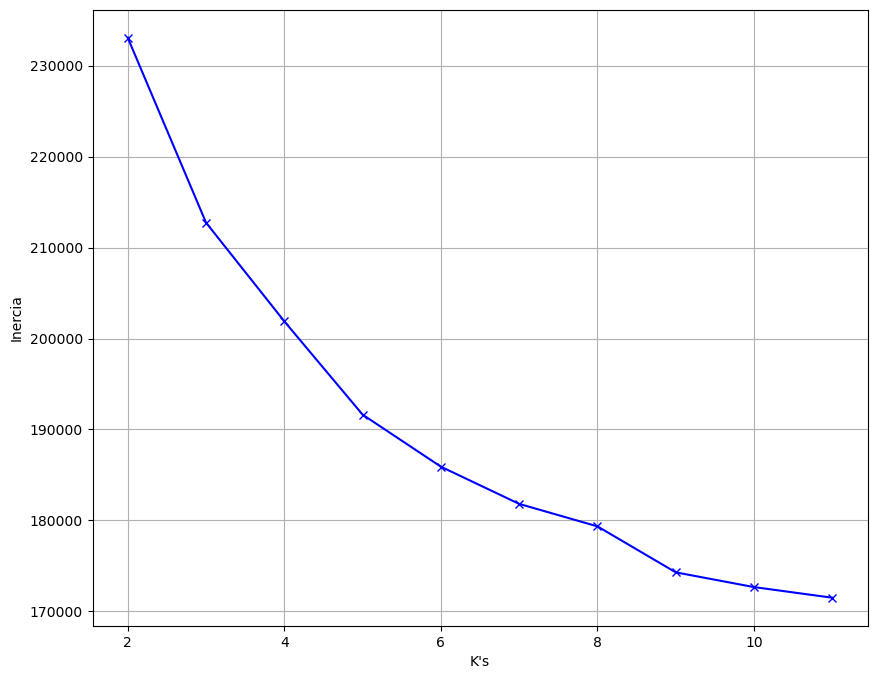

In [36]:
# Grafica para representar metodo del codo con las inercias para distintos K´s [2-11]

plt.figure(figsize = (10, 8))

plt.plot(range(2, len(inercias) + 2), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.grid()
plt.show()

In [ ]:
# El numero "idoneo" de clusters es 6. No seria descartable 5 o incluso 7

inercias #Inercia aparentemente alta: los clusters no estan bien compactados (alta dispersion de los puntos en su cluster)

[233078.04743710964,
 212742.21885716298,
 201890.3736673894,
 191629.7443969137,
 185906.1317261883,
 181814.41617765036,
 179342.25133107763,
 174286.233179671,
 172665.103199616,
 171495.9586438253]

**Silhouette_score**:
- es una métrica de evaluación de la calidad de un clustering que se utiliza para determinar cuán bien se han agrupado los clusters unos frente a otros.

- valores cercanos a 1 indican correcta separacion entre clusters, cercanos a 0 superposicion, cercanos a -1 incorrecta asignacion de los puntos a los clusters asignados 

In [34]:
silhouette_score(X, kmeans.labels_)

0.07770710788552378

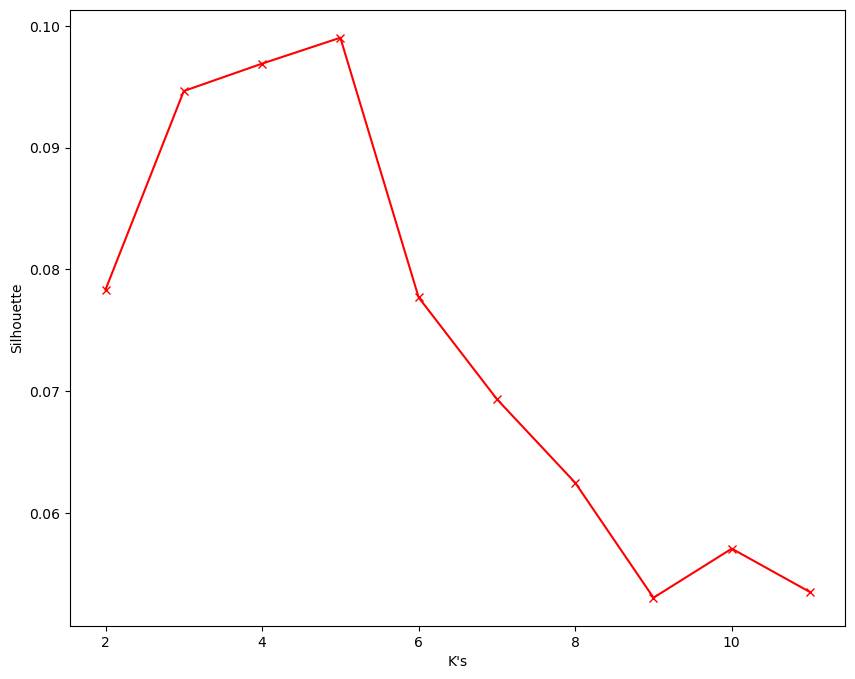

In [ ]:
#Representacion grafica de la relacion entre K y Silhouette

plt.figure(figsize = (10, 8))

plt.plot(range(2, len(sil_score) + 2), sil_score, marker = "x", color = "red")

plt.xlabel("K's") 
plt.ylabel("Silhouette") 

plt.show() #los valores de shilouette son muy cercanos a 0, indica superposicion de los clusters

 **Conclusion**: *clusters poco compactados y superpuestos*

In [1]:
################################################################################################################################

### **3.2 Clustering con DBSCAN**

In [38]:
# Exploracion previa a la aplicacion de DBSCAN

X.shape

(151, 54675)

In [39]:
# Estimacion de valor maximo de rango para el parametro "eps" para DBSCAN con el calculo de la raiz cuadrada

np.sqrt(54675)

233.82685902179844

In [ ]:
#Codigo para descubrir los mejores parametros posibles para DBSCAN

%%time

dbscan_params = list()

for eps in np.arange(0.1, 234, 0.1):
    
    for min_samples in (1, 152): # Parametro recomendado es valor 2*n_variables. No aplicable por numero enorme. Se cambia a tamaño maximo = n_filas
        
        for metric in ["cityblock", "euclidean", "manhattan"]:
            
            # DBSCAN
            dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
            dbscan.fit(X)
            
            # Clusters
            n_clusters = len(set(dbscan.labels_))
            
            # Outliers
            outliers = 1 if -1 in set(dbscan.labels_) else 0 
            
            # Score (shilouette score)
            try:
                sil_score = silhouette_score(X = X, labels = dbscan.labels_) 
            except:
                sil_score = np.nan
            
            dbscan_params.append([eps, min_samples, metric, sil_score, n_clusters, outliers])

UsageError: Line magic function `%%time` not found.


In [ ]:
# Transformacion a df de los parametros investigados

df_score = pd.DataFrame(data    = np.array(dbscan_params),
                        columns = ["eps", "min_samples", "metric", "score", "n_clusters", "outliers"])


,eps,min_samples,metric,score,n_clusters,outliers
0,0.1,1,cityblock,nan,151,0
1,0.1,1,euclidean,nan,151,0
2,0.1,1,manhattan,nan,151,0
6,0.2,1,cityblock,nan,151,0
7,0.2,1,euclidean,nan,151,0
...,...,...,...,...,...,...
2011,33.6,1,euclidean,-0.0006748904294609316,145,0
2017,33.7,1,euclidean,-0.0006748904294609316,145,0
2023,33.800000000000004,1,euclidean,-0.0005219255992454332,144,0
2005,33.5,1,euclidean,-0.0003941119606060529,146,0


In [ ]:
# Guardar el DataFrame en un .csv

df_score.to_csv("data_dbscan.csv", index = False)

In [40]:
#Trabajar el modelo de DBSCAN a partir del DataFrame anterior

df_score = pd.read_csv("data_dbscan.csv")

In [41]:
# Mejores parametros para DBSCAN

df_score= df_score.sort_values(by = ["score", "n_clusters"], ascending = False)
df_score

,eps,min_samples,metric,score,n_clusters,outliers
3487,58.2,1,euclidean,0.200789,2,0
3493,58.3,1,euclidean,0.200789,2,0
3499,58.4,1,euclidean,0.200789,2,0
3505,58.5,1,euclidean,0.200789,2,0
3511,58.6,1,euclidean,0.200789,2,0
...,...,...,...,...,...,...
14027,233.8,152,manhattan,NaN,1,1
14029,233.9,1,euclidean,NaN,1,0
14031,233.9,152,cityblock,NaN,1,1
14032,233.9,152,euclidean,NaN,1,1


In [42]:
df_score[(df_score["min_samples"] > 1) & (df_score["outliers"] == 0)] # No hay resultados que tomen mas de 1 sample que no contengan outliers


,eps,min_samples,metric,score,n_clusters,outliers


In [43]:
# #58.2	eps, 1 min_sample, euclidean metric es el mejor resultado obtenido en la exploracion 

dbscan = DBSCAN(eps = 58.2, min_samples= 1, metric= "euclidean") 
dbscan.fit(X)

DBSCAN(eps=58.2, min_samples=1)

In [45]:
# .labels_ retorna la "prediccion" de etiquetas del modelo de clustering

dbscan.labels_ # DBSCAN solo obtiene 2 grupos, uno de ellos con solo 1 componente de los 151 totales

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [46]:
#Counter para ver la cantidad de valores en cada grupo

Counter(dbscan.labels_) 

Counter({0: 150, 1: 1})

 **Conclusion**: *el clustering con DBSCAN es objetivamente malo, solo encuentra dos grupos, uno de ellos con solo un elemento*

In [ ]:
################################################################################################################

### **4. Enfoque hacia aplicacion de reduccion de dimensionalidad previa a clustering, basado en varianza y percentiles**

*Se pretende alcanzar reduccion suficiente de dimensionalidad que provoque una clusterizacion correcta, sin perdida notable de informacion explicativa*

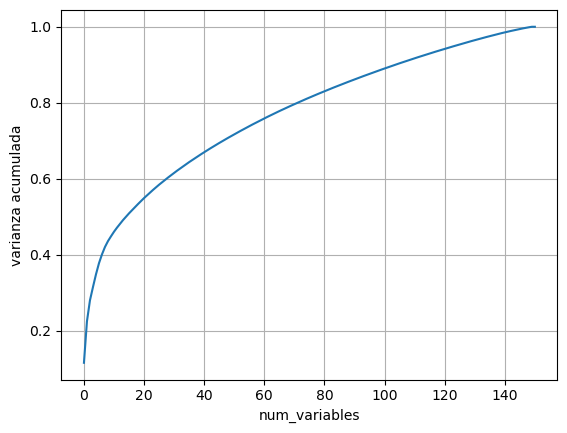

In [47]:
#Aplicacion de PCA
 

pca_plot = PCA().fit(X)

plt.plot(np.cumsum(pca_plot.explained_variance_ratio_))

plt.xlabel('num_variables')

plt.ylabel('varianza acumulada')

plt.grid()

*Con una reduccion a 120-140 variables podriamos mantener el 95-100% de la varianza explicativa*

In [48]:
# Obtencion del umbral minimo de varianza explicativa a conservar en el dataset resultante

df_filtrado = df.drop( labels= ["samples","type"] ,  axis = 1) # Eliminacion de columnas que no deben entrar al clustering

varianzas = df_filtrado.var().sort_values(ascending = False).values # Obtencion array con valores de varianza de mayor a menor

thresh = np.quantile(a = varianzas,  # Aplicacion de filtrado del array en base a percentil de variables y obtencion del umbral de varianza para aplicar al df 
                     q = 0.9975)

thresh

4.945326185153333

In [49]:
# Obtener array reduciendo cantidad variables en base al umbral de varianza

vt = VarianceThreshold(threshold = thresh)

df_var = vt.fit_transform(df_filtrado)

df_var.shape # Resulta una reduccion a 135 variables con alta varianza, por lo que hay cerca del 100% de varianza explicativa segun el estudio de PCA

(151, 135)

In [50]:
#Transformacion de los array en df usando los datos del array filtrado por varianzas

df_var = pd.DataFrame(data = df_var,
                      columns = df_filtrado.columns[vt.get_support()])

df_var

,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,201852_x_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,11.796615,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,11.994220,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,8.401393,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,12.153453,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,11.971752,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,12.005291,12.068921,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,12.077609,12.773526,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,11.720064,12.766966,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,12.523438,13.869308,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


### **5.Clustering con dataset reducido en dimensionalidad**

### **5.1 Clustering con DBSCAN**

In [51]:
# Valor de referencia para el rango maximo del parametro eps en la busqueda por parametros para DBSCAN

np.sqrt(135)

11.61895003862225

In [ ]:
#Busqueda de mejores paramentros DBSCAN para el nuevo df reducido

%%time

dbscan_params = list()

df_var_scaler = MinMaxScaler().fit_transform(df_var) # Normalizacion de datos

for eps in np.arange(0.1, 24, 0.1): # Aunque el valor de referencia estimado es 11-12, se duplica para mas opciones
    
    for min_samples in range(1, 152): # El valor de referencia suele ser 2*n_variables pero 270 es un numero demasiado grande y sin sentido, se limita al tamaño de n_filas
        
        for metric in ["euclidean"]:
            
            # DBSCAN
            dbscan = DBSCAN(eps = eps, min_samples = min_samples, metric = metric)
            dbscan.fit(df_var_scaler)
            
            # Clusters
            n_clusters = len(set(dbscan.labels_))
            
            # Outliers
            outliers = 1 if -1 in set(dbscan.labels_) else 0 
            
            # Score (shilouette score)
            try:
                sil_score = silhouette_score(X = X, labels = dbscan.labels_) 
            except:
                sil_score = np.nan
            
            dbscan_params.append([eps, min_samples, metric, sil_score, n_clusters, outliers])

CPU times: total: 2h 19min 45s
Wall time: 2h 7min 1s


In [ ]:
# df con los resultados obtenidos

dfvar_score = pd.DataFrame(data    = np.array(dbscan_params),
                        columns = ["eps", "min_samples", "metric", "score", "n_clusters", "outliers"])

In [ ]:
# Guardar en archivo .csv

dfvar_score.to_csv("data_dbscanvar2.csv", index = False)

In [52]:
# parametros optimos con DBSCAN

dfvar_score = pd.read_csv("data_dbscanvar2.csv")

dfvar_score= dfvar_score.sort_values(by = [ "score","n_clusters" ], ascending = False)
dfvar_score.head(50)

,eps,min_samples,metric,score,n_clusters,outliers
4832,3.3,1,euclidean,0.20144,2,0
4833,3.3,2,euclidean,0.20144,2,0
4834,3.3,3,euclidean,0.20144,2,0
4835,3.3,4,euclidean,0.20144,2,0
4836,3.3,5,euclidean,0.20144,2,0
4837,3.3,6,euclidean,0.20144,2,0
4838,3.3,7,euclidean,0.20144,2,0
4839,3.3,8,euclidean,0.20144,2,0
4840,3.3,9,euclidean,0.20144,2,0
4983,3.4,1,euclidean,0.20144,2,0


In [53]:
#Normalizacion datos

df_var_scaler = MinMaxScaler().fit_transform(df_var) 

In [54]:
# Mejores valores sin outliers eps 3.3, min_samples 9

dbscan = DBSCAN(eps = 3.3, min_samples= 9, metric= "euclidean") 
dbscan.fit(df_var_scaler)

DBSCAN(eps=3.3, min_samples=9)

In [55]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [56]:
# Obtencion de solo 2 clusters nuevamente

Counter(dbscan.labels_) 

Counter({0: 137, 1: 14})

 **Conclusion**: 
  - el clustering con DBSCAN mejora ligeramente al incluir mas elementos en el cluster minoritario, aunque sigue sin parecerse a la variable target real
  

In [ ]:
########################################################################################################

### **5.2 Clustering con K-Means**

In [57]:
kmeans = KMeans(n_clusters = 6, random_state = 42)

kmeans.fit(df_var_scaler)

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=6, random_state=42)

In [58]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 5, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 5, 2, 2, 5, 2, 5, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 5, 2, 2, 5, 2, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 2, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 0, 5, 5, 5, 5, 0])

In [59]:
kmeans.cluster_centers_

array([[0.63024894, 0.54879284, 0.78680093, 0.51670918, 0.81267041,
        0.4335184 , 0.75552058, 0.53057904, 0.88054056, 0.8793531 ,
        0.64020532, 0.21648876, 0.24652914, 0.4597088 , 0.90153955,
        0.90827627, 0.78252521, 0.4494464 , 0.66833333, 0.60044832,
        0.63811565, 0.51435938, 0.30089032, 0.50482459, 0.72668442,
        0.71734196, 0.61550385, 0.64983898, 0.40972381, 0.45400298,
        0.7992231 , 0.45339117, 0.66736603, 0.30745159, 0.18348984,
        0.22257862, 0.37145836, 0.67049931, 0.31008549, 0.3605503 ,
        0.49786211, 0.08391364, 0.08274672, 0.56325724, 0.50516794,
        0.57818384, 0.73244826, 0.6632436 , 0.54462097, 0.44990251,
        0.58347653, 0.35953739, 0.13883944, 0.36043841, 0.80445156,
        0.74323053, 0.32217484, 0.76330132, 0.24634397, 0.54942694,
        0.42046093, 0.35728997, 0.24975085, 0.1737422 , 0.77555286,
        0.26608604, 0.89770967, 0.51783014, 0.87438358, 0.84085318,
        0.63056949, 0.59691723, 0.6465303 , 0.45

In [60]:
kmeans.inertia_

746.3604965080206

In [62]:
#se devuelve la columna "type" al df, es necesaria para el reetiquetado correcto de los clusters

df_var.insert(0, "type", df["type"])
df_var

,type,1553394_a_at,1553434_at,1553602_at,1555745_a_at,1555778_a_at,1558034_s_at,200795_at,201525_at,201744_s_at,...,234764_x_at,237086_at,237339_at,237395_at,238481_at,240304_s_at,242579_at,243241_at,37892_at,AFFX-HUMRGE/M10098_5_at
0,0,4.233874,3.265404,5.550369,7.978587,10.149991,8.472089,9.253729,4.869761,10.393279,...,11.049998,3.196762,3.421710,3.062842,6.041615,5.417186,7.765471,3.410798,9.247128,14.750905
1,0,4.365289,3.039451,5.082131,8.209669,10.565070,10.885585,8.723529,10.443652,10.555914,...,7.026088,3.589533,3.854429,3.433153,8.768485,9.040942,3.953117,3.527696,9.709350,9.938357
2,0,3.968636,3.218806,5.058542,7.069091,6.458419,6.681809,7.790371,4.994940,7.228274,...,8.037242,3.590720,3.914056,2.946176,11.163068,4.715663,8.247427,3.736870,5.286003,13.605901
3,0,3.957113,3.123551,4.941430,10.828737,10.472814,4.925068,9.533376,9.251773,11.059959,...,9.791557,3.077316,3.875099,3.642785,5.307583,4.041742,3.756744,3.383925,8.137780,12.146083
4,0,4.172743,3.379377,4.553402,9.644561,10.336155,8.033157,9.711141,5.770348,11.116482,...,9.564089,3.293097,3.851047,3.200595,7.451804,4.324159,6.240655,3.530320,9.572701,12.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,5,9.434317,4.283417,11.294522,5.472975,10.170533,5.329359,9.565351,7.991633,12.005291,...,5.773449,8.856752,10.534218,5.976024,5.500146,10.163966,11.044550,6.115136,11.126593,9.923589
147,5,3.975292,3.960576,7.174051,3.746878,11.831214,3.632642,9.304357,8.285264,12.077609,...,6.569463,9.941070,3.995993,3.628036,8.114911,6.583352,4.508672,8.058744,10.900590,9.430705
148,5,4.504307,3.234825,7.732858,8.672920,11.567906,7.800081,10.568175,9.194895,11.720064,...,6.610460,8.386519,3.702366,4.501794,9.134859,4.503098,4.429813,5.282924,8.741613,7.918535
149,5,4.203309,8.622734,11.178786,4.548085,12.865115,3.941158,11.988042,10.009357,12.523438,...,9.686360,9.495707,11.823017,5.992303,8.246486,10.211326,6.080322,8.255200,10.176057,6.612476


In [63]:
# Para permutar las etiquetas y hacer que coincidan con las de la variable "type" se calculan las distancias entre puntos de los clusters y puntos de "type"

def distance_cluster(P1, P2): # Funcion para calcular distancias entre valores de etiquetas de clustering vs valores de etiquetas de clase de la variable "type"
    
    return np.sqrt(np.sum([(x - y)**2 for x, y in zip(P1, P2)])) # Calculo de la distancia euclideana entre puntos
                                                                 # Las distancias mas bajas entre cluster y clase real "type" corresponderan a las etiquetas correctas para el clustering

df_var["cluster"] = kmeans.labels_ 

#####################################################################################

mean_type = df_var.drop("cluster", axis = 1).groupby("type", as_index = False).mean() # Calculo de la media agrupando por los valores de "type"

mean_cluster = df_var.drop("type", axis = 1).groupby("cluster", as_index = False).mean() # Calculo de la media agrupando por los valores de "cluster"

#####################################################################################

# Se crea DataFrame con los valores de etiquetas "type", "cluster" y el calculo de distancias entre grupos

distancias = list()

for t in mean_type["type"]: 
    for c in mean_cluster["cluster"]:
                
        d = distance_cluster(mean_type[mean_type["type"] == t].iloc[:, 1:].values, mean_cluster[mean_cluster["cluster"] == c].iloc[:, 1:].values)
        
        distancias.append([t, c, d])
        
        
df_var_distancias = pd.DataFrame(data = distancias, columns = ["type", "cluster", "distancia"])

#####################################################################################

pd.concat([df_var_distancias[df_var_distancias["type"] == i].sort_values(by = "distancia") for i in range(0, 6)]).sort_values("distancia")

,type,cluster,distancia
22,3,4,0.000000
15,2,3,0.000000
1,0,1,2.108064
6,1,0,2.833730
26,4,2,4.901491
35,5,5,5.350738
29,4,5,12.319684
32,5,2,15.389296
30,5,0,18.683727
11,1,5,22.236546


In [64]:
#Codigo para reasignar la etiqueta de clustering a la etiqueta mas correcta de la variable type en base a las distancias calculadas anteriormente

map_cluster = {0 : 1, #Que valor de cluster corresponde a que valor de "type" en base a distancia minima
               1 : 0,
               2 : 4,
               3 : 2,
               4 : 3,
               5 : 5}

dict_type3 = {v : k for k, v in dict_type.items()}

df_var["cluster"] = df_var["cluster"].apply(lambda x : map_cluster[x]) # Reasignar etiquetas a los clusters en base al mapeo anterior

############################################################################################

df_var_1 = pd.DataFrame(df_var.value_counts(["type"])).reset_index()  # df1 con conteos de variable "type"

df_var_1.columns = ["label", "count"]

df_var_1["cat"] = "type"

df_var_2 = pd.DataFrame(df_var.value_counts(["cluster"])).reset_index()   # df2 con conteos de variable "cluster"

df_var_2.columns = ["label", "count"]

df_var_2["cat"] = "cluster"

df_var_final_cluster = pd.concat([df_var_1, df_var_2])  # Union de los dos dfs

#############################################################################################

# grafico de representacion de conteo de la variable type comparando con el conteo de los clusters reetiquetados por distancia

df_var_final_cluster = df_var_final_cluster.sort_values("label")

df_var_final_cluster["label"] = df_var_final_cluster["label"].apply(lambda x : dict_type3[x])

# df_final_cluster["label"] = df_final_cluster["label"].astype("str")

px.bar(data_frame = df_var_final_cluster, x = "label", y = "count", color = "label", facet_col = "cat", )

**Confusion Matrix**: sirve para evaluar la precisión de una clasificación

In [65]:
#Matriz de confusion entre prediccion de clustering y variable "type" original

confusion_matrix(df_var["type"], df_var["cluster"])

array([[38,  2,  0,  0,  0,  1],
       [ 2, 26,  0,  0,  0,  2],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0, 21,  8],
       [ 0,  5,  0,  0,  1, 24]], dtype=int64)

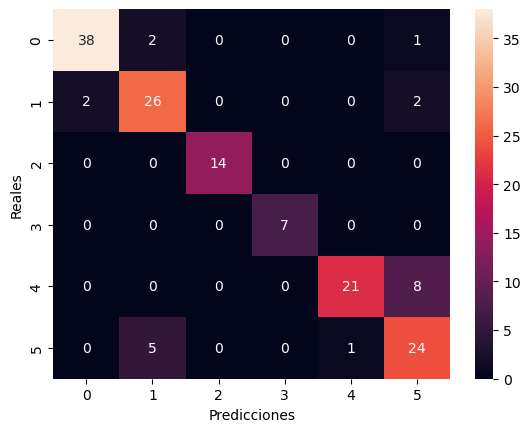

In [66]:
#Representacion de la confusion matrix en un mapa de calor

conf_matrix = metrics.confusion_matrix(df_var["type"], df_var["cluster"])
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.show()

**Accuracy**: de la prediccion por clustering con respecto a los datos reales

In [67]:
accuracy_score(df_var["type"], df_var["cluster"])

0.8609271523178808

In [68]:
#Metodo del codo (Inercias, Shilouette)

inercias = list() 

sil_score = list()

for k in range(2, 12): 
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_var_scaler)    
    
    inercias.append(kmeans.inertia_) 
    sil_score.append(silhouette_score(df_var_scaler, kmeans.labels_))
    
inercias

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\mary_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\mar

[1160.2884986699828,
 957.6880662914856,
 835.2011131348622,
 781.6175990989472,
 746.3604965080206,
 716.9002797110219,
 687.2912666554677,
 667.6788752434263,
 654.5706054223547,
 636.4978965080645]

In [ ]:
#Valor de Silhouette Score

silhouette_score(df_var_scaler, kmeans.labels_)

0.10998747086292292

 **Metodo del codo**: es una técnica utilizada en clustering (agrupamiento) para encontrar el número óptimo de clusters (grupos) en un conjunto de datos. 

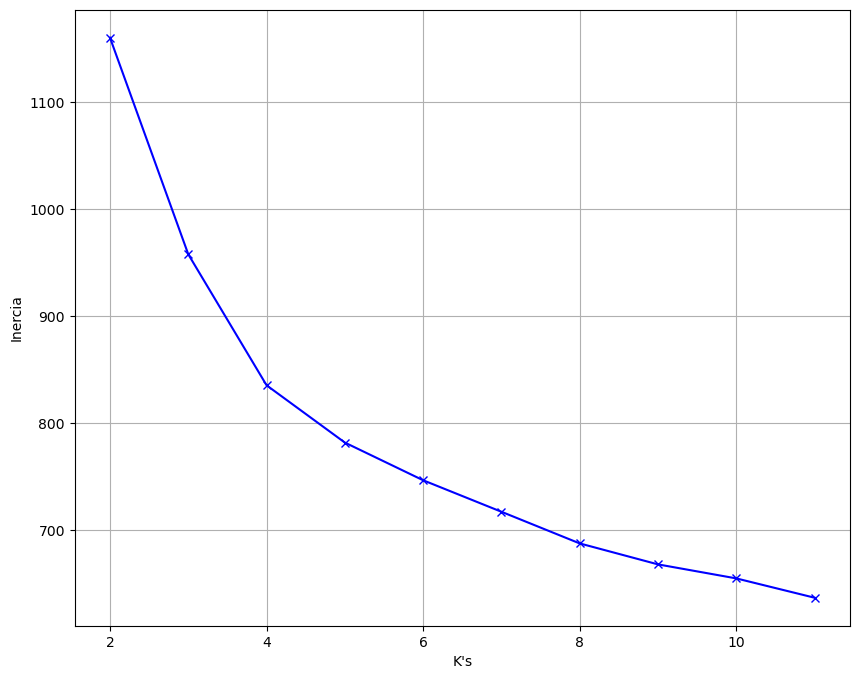

In [69]:
#Elbow plot de inercias para distintos K´s [2-11]

plt.figure(figsize = (10, 8))

plt.plot(range(2, len(inercias) + 2), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.grid()
plt.show()

**Silhouette_score**:
- es una métrica de evaluación de la calidad de un clustering que se utiliza para determinar cuán bien se han agrupado los clusters unos frente a otros.

- valores cercanos a 1 indican correcta separacion entre clusters, cercanos a 0 superposicion, cercanos a -1 incorrecta asignacion de los puntos a los clusters asignados

In [70]:
#Valor de Silhouette Score

silhouette_score(df_var_scaler, kmeans.labels_)

0.10998747086292292

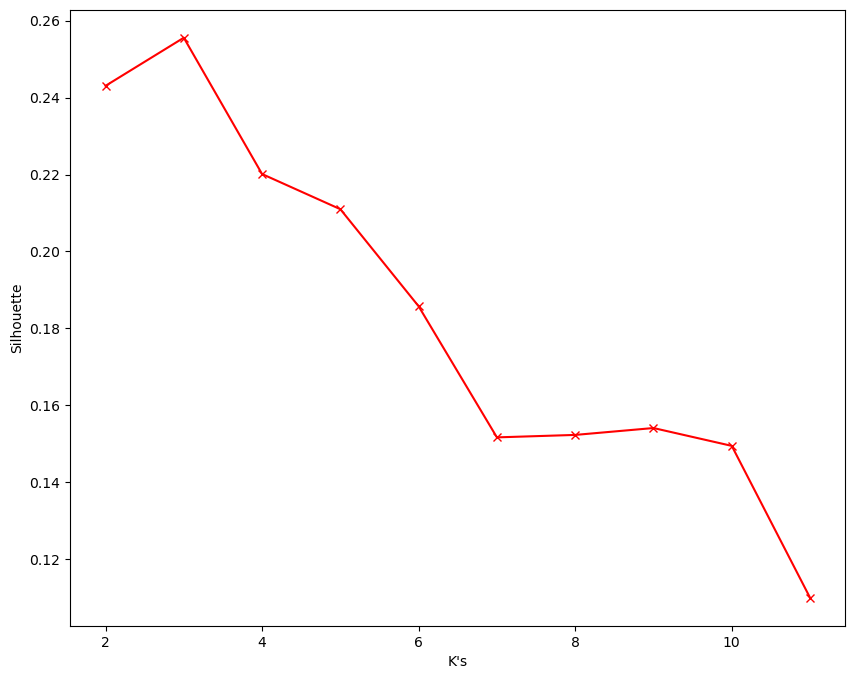

In [71]:
# Grafica que representa la relacion entre los K's y Silhouette

plt.figure(figsize = (10, 8))

plt.plot(range(2, len(sil_score) + 2), sil_score, marker = "x", color = "red")

plt.xlabel("K's") 
plt.ylabel("Silhouette") 

plt.show()

### **Conclusion:**
- inercias y shilouette mejoran bastante con respecto a las pruebas con dataset global, hay mejor compactacion de los clusters y mejor diferenciacion entre ellos

- el accuracy mejora notablemente

- la reduccion de dimensionalidad y el criterio utilizados aparentemente han sido exitosos
                
                

                
                

